<a href="https://colab.research.google.com/github/intimanjunath/DeepLearning-Performance-Analytics/blob/main/regression_Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install/Upgrade wandb if needed
!pip install --upgrade wandb

# Cell 1: Imports and WandB Initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    roc_curve, precision_recall_curve, auc, classification_report, accuracy_score
)
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

# Use the alternative wandb import for the Keras callback
from wandb.integration.keras import WandbCallback
import wandb

# Initialize wandb (if not already logged in, run !wandb login in a separate cell)
wandb.init(project="dl_regression_project", config={
    "epochs": 50,
    "batch_size": 32,
    "optimizer": "adam",
    "loss": "mse"
})

<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: manjunatha-inti (manjunatha-inti-san-jose-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [2]:
# Cell 2: Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Standardize features for better training performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Cell 3: Build the neural network model (a simple MLP for regression)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()  # Display the model architecture

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Cell 4: Train the model using a validation split and log metrics with wandb
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=wandb.config.epochs,
    batch_size=wandb.config.batch_size,
    callbacks=[WandbCallback(save_model=False, save_graph=False)],  # Disable model saving/graph logging
    verbose=1
)

wandb: WARNING WandbCallback is deprecated and will be removed in a future release. Please use the WandbMetricsLogger, WandbModelCheckpoint, and WandbEvalCallback callbacks instead. See https://docs.wandb.ai/guides/integrations/keras for more information.


Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6423 - mae: 0.8881 - val_loss: 0.5050 - val_mae: 0.4948
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5191 - mae: 0.5152 - val_loss: 0.4336 - val_mae: 0.4658
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4552 - mae: 0.4783 - val_loss: 0.4194 - val_mae: 0.4465
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4111 - mae: 0.4569 - val_loss: 0.3951 - val_mae: 0.4390
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4014 - mae: 0.4498 - val_loss: 0.3897 - val_mae: 0.4404
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3914 - mae: 0.4401 - val_loss: 0.3760 - val_mae: 0.4247
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3721 - mae: 0.4338 - val_loss: 0.3838 - val_mae: 0.4416
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3473 - mae: 0.4233 - val_loss: 0.3720 - val_mae: 0.4255
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

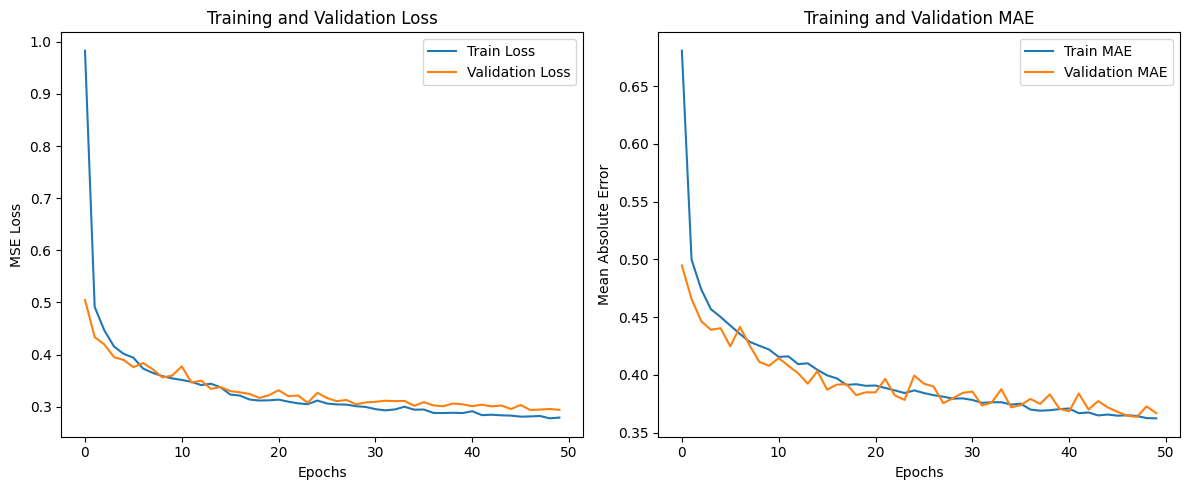

In [5]:
# Cell 5: Plot the training history (loss and MAE over epochs)
plt.figure(figsize=(12, 5))

# Plot Loss (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Mean Absolute Error (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()

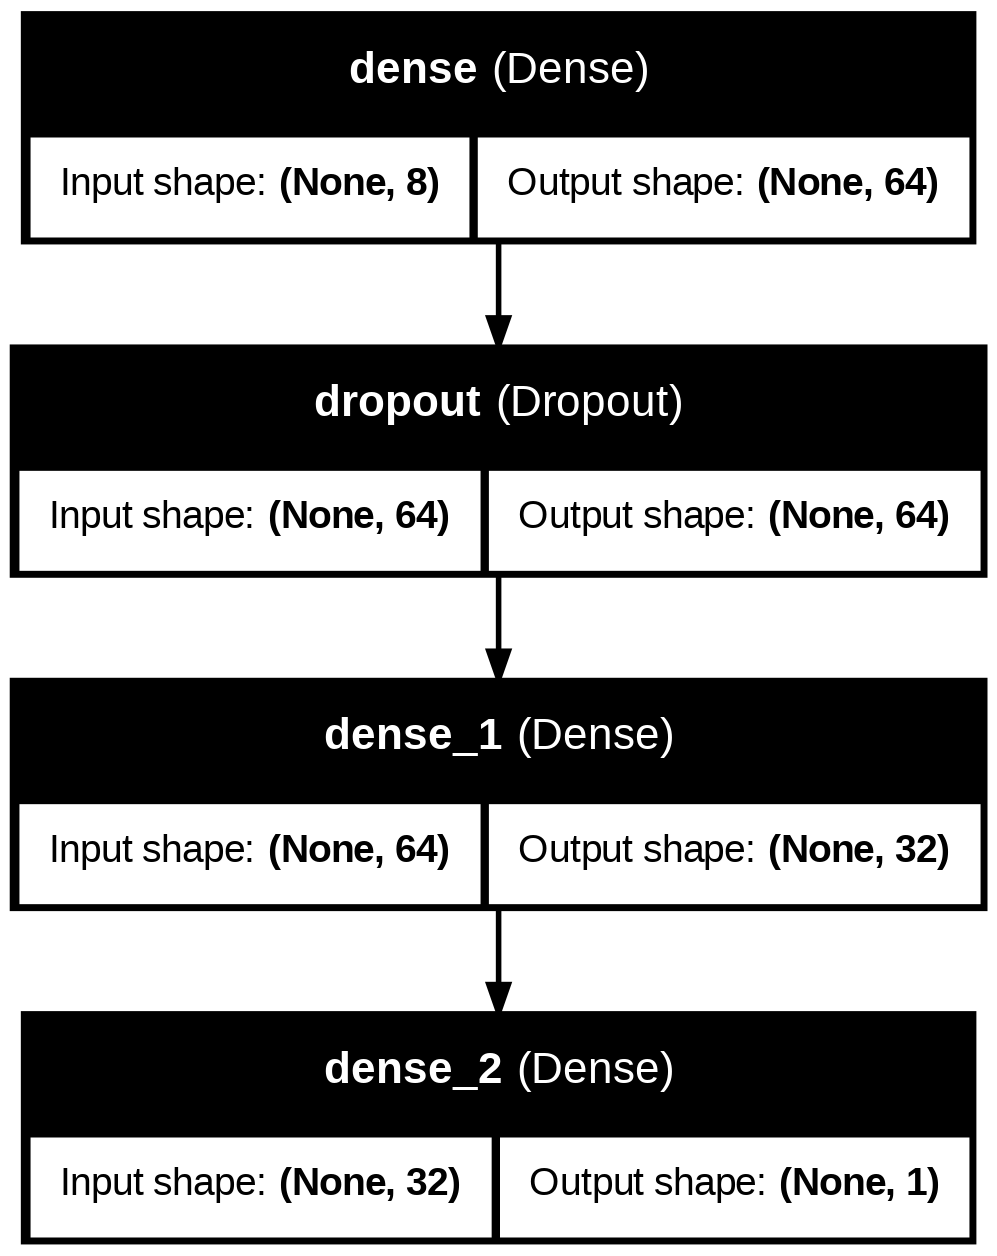


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

In [6]:
# Cell 6: Visualize the model architecture
from IPython.display import Image, display

# Save the model architecture to a file
plot_model(model, to_file='regression_model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the model architecture image in Colab
display(Image('regression_model_architecture.png'))

# Optionally, print the model summary for additional details
print("\nModel Summary:")
model.summary()

In [13]:
# Cell 7: Evaluate the regression model on the test set
y_pred = model.predict(X_test).ravel()  # Get predicted continuous values

# Compute standard regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.3f}, Test MAE: {mae:.3f}, Test R2: {r2:.3f}")
wandb.log({"Test MSE": mse, "Test MAE": mae, "Test R2": r2})

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE: 0.279, Test MAE: 0.355, Test R2: 0.787


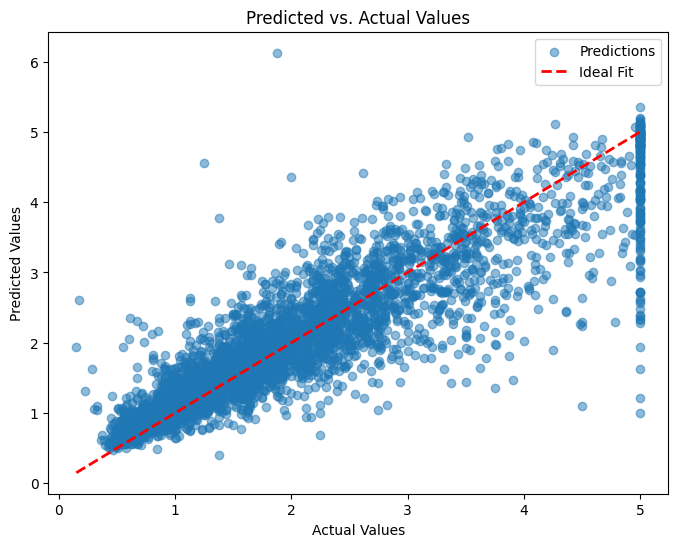

<Figure size 640x480 with 0 Axes>

In [14]:
# Cell 8: Visualize Predictions vs. Actual Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.legend()
plt.show()

# Log the plot as an artifact in wandb
wandb.log({"Predicted_vs_Actual": wandb.Image(plt)})

In [15]:
# Cell 9: Compute Additional Regression Metrics
from sklearn.metrics import median_absolute_error, explained_variance_score, mean_absolute_percentage_error

# Calculate additional metrics
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the additional metrics
print(f"RMSE: {rmse:.3f}")
print(f"Median Absolute Error: {medae:.3f}")
print(f"Explained Variance Score: {explained_var:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}")

# Log these metrics to wandb
wandb.log({
    "RMSE": rmse,
    "Median Absolute Error": medae,
    "Explained Variance Score": explained_var,
    "MAPE": mape
})


RMSE: 0.529
Median Absolute Error: 0.238
Explained Variance Score: 0.787
Mean Absolute Percentage Error (MAPE): 0.202
